# Linear Regression Guided Project

**`FCAI-CU-Community:`**
- [Discord](https://discord.gg/UGpXXsQ2qw)
- [GitHub](https://github.com/FCAI-CU-AI-Community)
- [YouTube](https://youtube.com/@fcai-cu-ai-community?si=qaeEzzDrOnrZpeph)


# Outline:

- [Introduction](#id1)
- [Problem Statement](#id2)
- [Setting up the Environment](#id3)
- [Data](#id4)
- [Exploratory Data Analysis (EDA)](#id5)
- [Data Preprocessing](#id6)
- [Modeling](#id7)
- [Testing](#id8)
- [Evaluation](#id9)
- [Revisiting](#id10)
- [Submission](#id11)

## <a id="id1">Introduction</a>

In this guided project, we will use the `Linear Regression` algorithm to predict the `Student's Performance` based on some features.

## <a id="id2">Problem Statement</a>

**Why do some students perform better than others?** This question is crucial for educators and policymakers seeking to improve educational outcomes. By analyzing student performance data, we can identify factors influencing academic success and develop targeted interventions to support students at risk of falling behind.

### Details:
- **Objective**: Develop a regression model to estimate final scores.
- **Use Case**: Assist in identifying factors influencing student outcomes, potentially aiding targeted educational interventions.
- **Target Variable**: Performance Index.

## <a id="id3">Setting up the Environment</a>

### 1. Import some required libraries (NumPy, Pandas, Matplotlib, Seaborn).

In [255]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## <a id="id4">Data</a>

### 1. Loading and Exploring the Data.

#### 1.1. Read the data card from here: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

#### 1.2. Load and view the data.

In [256]:
# Load the data
data = pd.read_csv('E:\Data Science\AI_Community\GitHub_Organization\Data\Student Performance Data\Student_Performance.csv')

# View the first few rows of the data
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


#### 1.3. How many rows and columns are there in the data?

In [257]:
# print the shape of the data
print(data.shape)

(10000, 6)


#### 1.4. What are the columns in the data?

In [258]:
# print the columns of the data
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

#### 1.5. What are the data types of the columns, the memory usage of the data and the number of non-null values in the columns?

In [259]:
# print the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


## <a id="id5">Exploratory Data Analysis (EDA)</a>

#### 2.1. Check for missing values.

In [260]:
# print the null count for each column
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [261]:
# print the null count for all the data
data.isnull().sum().sum()

np.int64(0)

#### 2.2. print the statistical summary of the data.

In [262]:
# describe the data
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Warm-up: Can you figure out if there is any outliers in the data?

*hint: Look at the mean and median values of the columns.*

In [263]:
# describe the categorical features
data.describe(include='object')

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


<Axes: xlabel='Extracurricular Activities', ylabel='Count'>

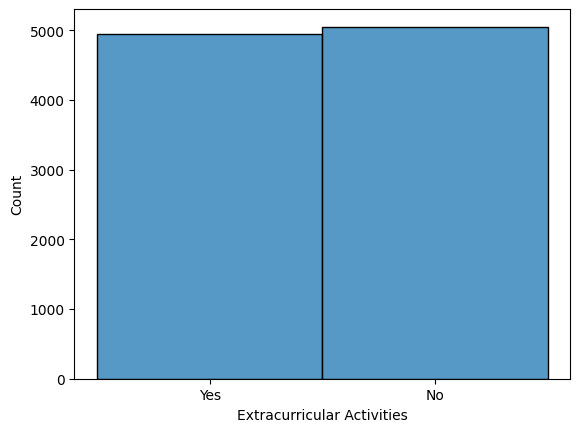

In [264]:
# Plot a histogram for the categorical features
sns.histplot(data['Extracurricular Activities'])

#### 2.3. Plot the boxplot of each column.

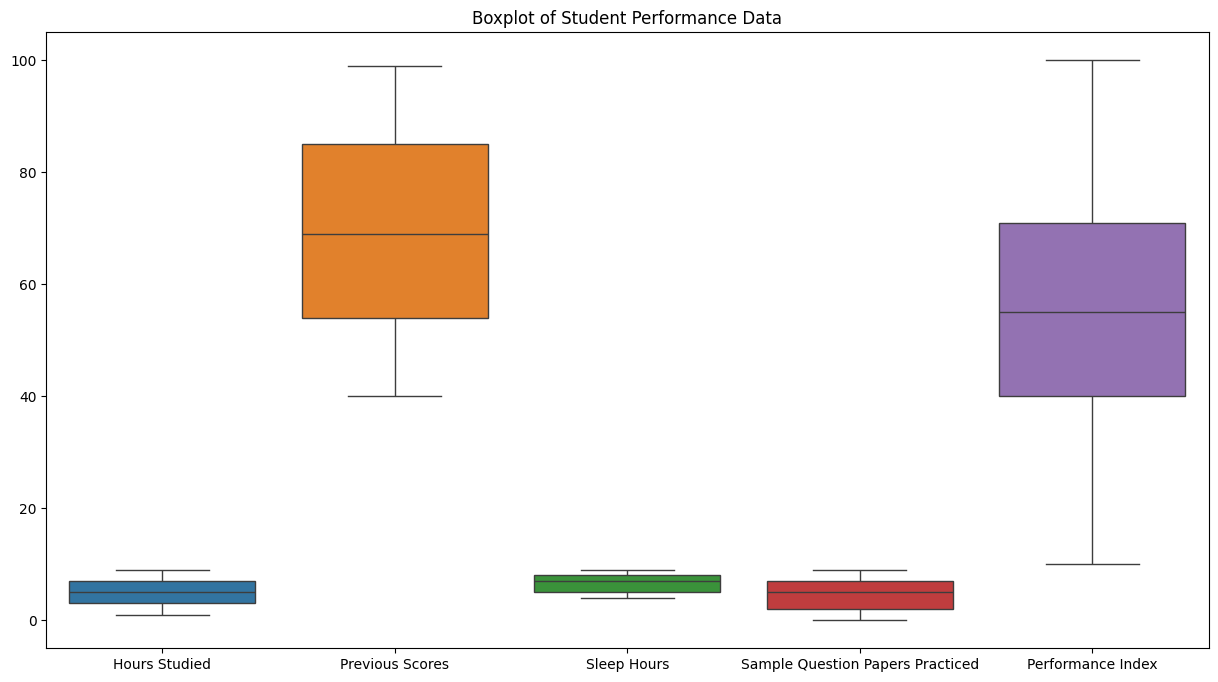

In [265]:
# set the figure size to (10, 5)
plt.figure(figsize=(15, 8))
# Set the figure title to 'Boxplot of Student Performance Data'
plt.title('Boxplot of Student Performance Data')
# create a boxplot of the data (use sns)
sns.boxplot(data=data)
# show the plot
plt.show()

#### 2.4. Target Feature Analysis.

In [266]:
# Describe the target variable
data['Performance Index'].describe()

count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64

Questions:
- What is the range of values for the target feature?
- What is the mean and median of the target feature?

<Axes: xlabel='Performance Index', ylabel='Count'>

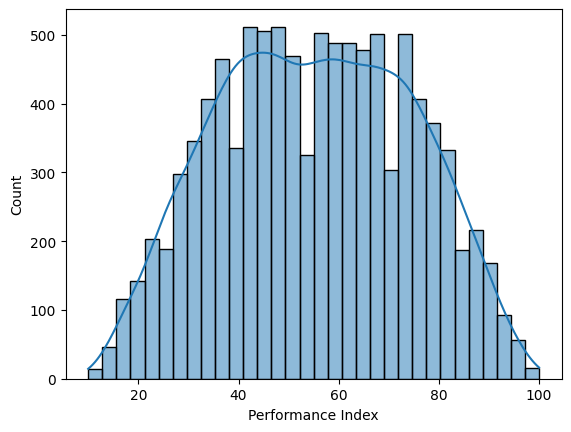

In [267]:
# Plot the distribution of the target variable with kernel density estimation
sns.histplot(data['Performance Index'], kde=True)

Questions:
- Is the target feature normally distributed?

<Axes: ylabel='Performance Index'>

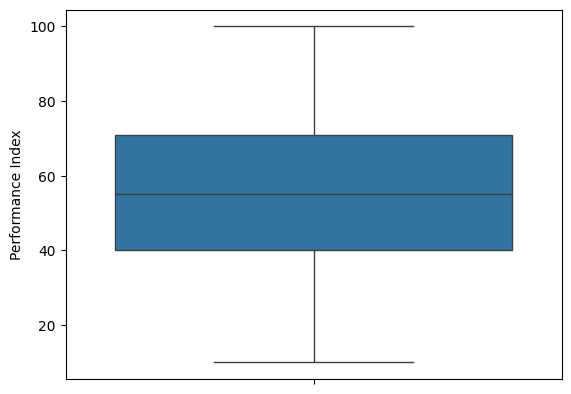

In [268]:
# Plot the boxplot of the target variable
sns.boxplot(data['Performance Index'])

Questions:
- Ar there any outliers in the target feature?

#### 2.5. Numerical Analysis. (Discrete Features)

In [269]:
# select the numerical data
numerical_data = data.select_dtypes(include='number')

# print the first few rows of the numerical data
numerical_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [270]:
# select the discrete numerical data (having less than 11 unique values)
discrete_features = [col for col in numerical_data.columns if numerical_data[col].nunique() <= 10]
discrete_features.append('Performance Index')
discrete_data = numerical_data[discrete_features]

# print the first few rows of the discrete data
discrete_data.head()

,Hours Studied,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,9,1,91.0
1,4,4,2,65.0
2,8,7,2,45.0
3,5,5,2,36.0
4,7,8,5,66.0


In [271]:
# Print the unique values of the discrete data
for col in discrete_data.columns:
    print(f'{col}: {discrete_data[col].unique()}')

Hours Studied: [7 4 8 5 3 6 2 1 9]
Sleep Hours: [9 4 7 5 8 6]
Sample Question Papers Practiced: [1 2 5 6 0 8 3 4 9 7]
Performance Index: [ 91.  65.  45.  36.  66.  61.  63.  42.  69.  84.  73.  27.  33.  68.
  43.  67.  70.  30.  71.  85.  57.  35.  49.  83.  74.  39.  58.  47.
  60.  32.  64.  54.  17.  53.  75.  52.  78.  38.  98.  87.  41.  81.
  15.  88.  95.  29.  21.  76.  25.  34.  50.  56.  82.  23.  46.  92.
  77.  86.  44.  94.  40. 100.  31.  26.  18.  51.  72.  16.  28.  89.
  48.  37.  62.  59.  19.  79.  22.  10.  90.  80.  24.  20.  96.  55.
  97.  12.  93.  14.  99.  11.  13.]


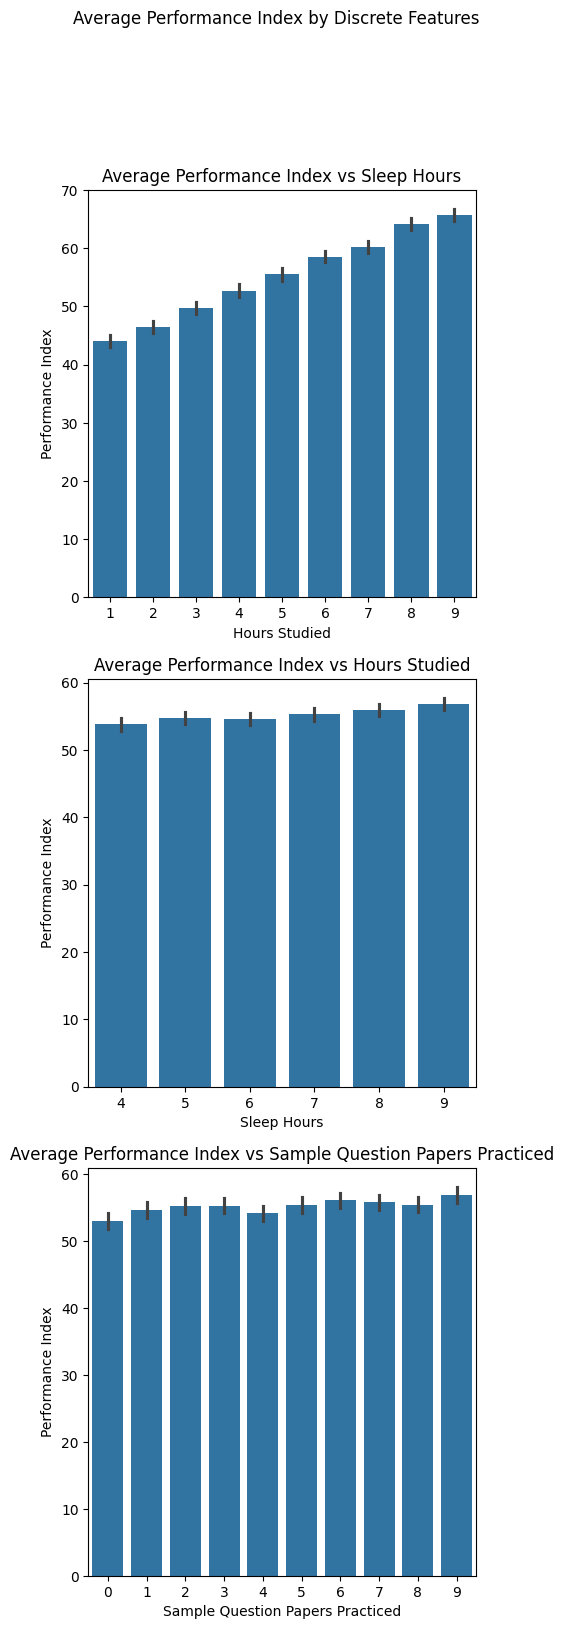

In [272]:
# Visualize Discrete Features with their average Performance Index

# 1. Create a subplot with the appropriate rows and columns with a figure size of (15, 5)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 18))
fig.suptitle('Average Performance Index by Discrete Features')
# 2. Set the figure title to 'Average Performance Index by Discrete Features'
# 3. For each subplot, select the subplot, add an appropriate title (Avg Performance Index vs. ...) and create a barplot of the feature (use sns)
sns.barplot(data=discrete_data, x='Hours Studied', y='Performance Index', ax=ax1)
ax1.set_title('Average Performance Index vs Sleep Hours')
sns.barplot(data=discrete_data, x='Sleep Hours', y='Performance Index', ax=ax2)
ax2.set_title('Average Performance Index vs Hours Studied')
sns.barplot(data=discrete_data, x='Sample Question Papers Practiced', y='Performance Index', ax=ax3)
ax3.set_title('Average Performance Index vs Sample Question Papers Practiced')
# 4. Show the plot
plt.show()

Questions:
- What is the relationship between the target and each of the discrete numerical features?
- Which feature do you think has the most impact on the target feature?
- Which feature do you think has the least impact on the target feature (Can be removed)?
- Does the students who sleep more hours perform better?
- Does the students who study more hours perform better?
- Does the students who practiced more questions perform better?

In [ ]:
# Remove the features that having the least impact on the target variable
data.drop('Sleep Hours', axis=1, inplace=True)
data.drop('Sample Question Papers Practiced', axis=1, inplace=True)

#### 2.6. Numerical Analysis. (Continuous Features)

In [274]:
# Select the continuous numerical data
continuous_features = [col for col in numerical_data.columns if col not in discrete_features]
continuous_features.append('Performance Index')
continuous_data = numerical_data[continuous_features]

# Print the first few rows of the continuous data
continuous_data.head()

,Previous Scores,Performance Index
0,99,91.0
1,82,65.0
2,51,45.0
3,52,36.0
4,75,66.0


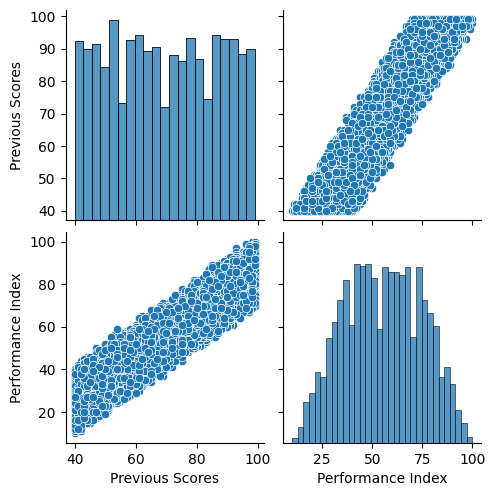

In [275]:
# Plot a scatter for each feature against the other features (pairplot)
sns.pairplot(data=continuous_data)

# show the plot
plt.show()

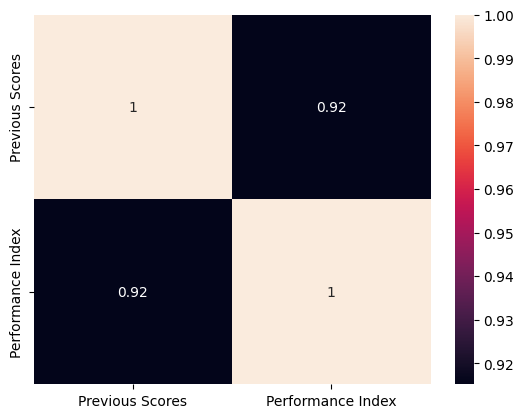

In [276]:
# Plot the correlation matrix of the continuous data
corr = continuous_data.corr()
sns.heatmap(corr, annot=True)

# show the plot
plt.show()

Questions:
- What is the relationship between the target and each of the continues numerical features?
- Which feature do you think has the most impact on the target feature?
- Which feature do you think has the least impact on the target feature (Can be removed)?
- Does the previous score of the student affect the performance index? Is it increasing or decreasing?

#### 2.7. Categorical Analysis.

In [277]:
# select the categorical data
categorical_data = data.select_dtypes(include='object')

# Merge the categorical data with the target variable
categorical_data = categorical_data.merge(data['Performance Index'], left_index=True, right_index=True)

# print the first few rows of the categorical data
categorical_data.head()

,Extracurricular Activities,Performance Index
0,Yes,91.0
1,No,65.0
2,Yes,45.0
3,Yes,36.0
4,No,66.0


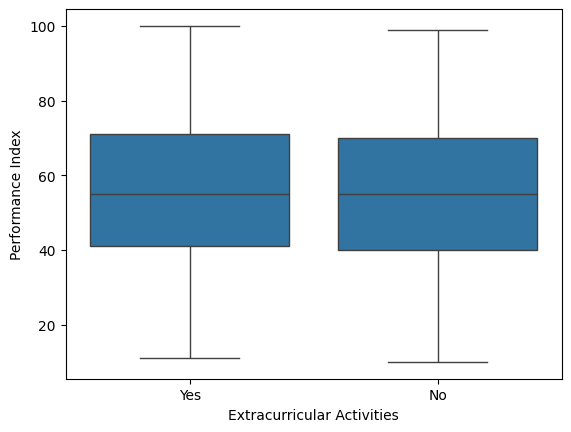

In [278]:
# Plot box plots of the categorical data against the target variable
sns.boxplot(data=categorical_data, x='Extracurricular Activities', y='Performance Index')

# show the plot
plt.show()

Questions:
- What is the relationship between the target and each of the categorical features?
- Does the students that do an extracurricular activity perform better than those who don't?

## <a id="id6">Data Preprocessing</a>

In [279]:
# Convert the categorical data to numerical data using one-hot encoding
data = pd.get_dummies(data, drop_first=True, dtype=int)

# print the first few rows of the data
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


## <a id="id7">Modeling</a>

### 1. Splitting the data.

#### 1.1. Split the data into features and target.

In [280]:
# Select the features and put them in X
X = data.drop('Performance Index', axis=1)
# Select the target variable and put it in y
y = data['Performance Index']


#### 1.2. Split the data into training and testing sets.

In [281]:
# import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Set the random state to 42
random_state = 42
# Set the test size to 0.2
test_size = 0.2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Print the shape of the training and testing sets
print(f'Training set shape: {X_train.shape, y_train.shape}')
print(f'Testing set shape: {X_test.shape, y_test.shape}')

Training set shape: ((8000, 5), (8000,))
Testing set shape: ((2000, 5), (2000,))


### 2. Building and Training the Model.

In [282]:
# import the linear regression model from sklearn
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [283]:
# Print the model parameters
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Intercept: -33.92194621555611
Coefficients: [2.85248393 1.0169882  0.47694148 0.19183144 0.60861668]


In [284]:
# print the model score (R^2) on the training data
print(f'Training Score: {model.score(X_train, y_train)}')

Training Score: 0.9886898790682355


# <a id="id8">Testing</a>

In [285]:
# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# print the first few predictions
print("First few predictions:\n", y_pred[:5])

# print the first few actual values
print("First few actual values:\n", y_test[:5].values)

First few predictions:
 [54.71185392 22.61551294 47.90314471 31.28976748 43.00457042]
First few actual values:
 [51. 20. 46. 28. 41.]


## <a id="id9">Evaluation</a>

In [286]:
# import the mean squared error function from sklearn
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

# print the mean squared error
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.082628398521857


In [287]:
# import the r2_score function from sklearn
from sklearn.metrics import r2_score

# Calculate the R^2 score of the model
r2 = r2_score(y_test, y_pred)

# print the R^2 score as a percentage
print(f'R^2 Score: {r2 * 100:.2f}%')

R^2 Score: 98.90%


## <a id="id10">Revisiting</a>

Try training the model with all the features and see if the performance of the model changes *significantly*.

## <a id="id11">Submission</a>

1. Go to the code section of the data set and click on the `New Notebook` button.
2. Click on the `File` tab in the top left corner of the notebook.
3. Click import notebook.
4. Upload the notebook file.
5. Click on the `Save Version` button then click on the `Save` button.
6. Wait for the notebook to be saved and then click on the `Show Version` button (number beside the `Save Version` button).
7. Click on the `Go to Viewer` button.
8. Click on Share, Choose `public`.
9. Copy the link and paste it in `task-submission` channel.
10. You are done! 🎉
